# Cours #5: Devoir corrigé

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import casadi as cas
import scipy

## #1

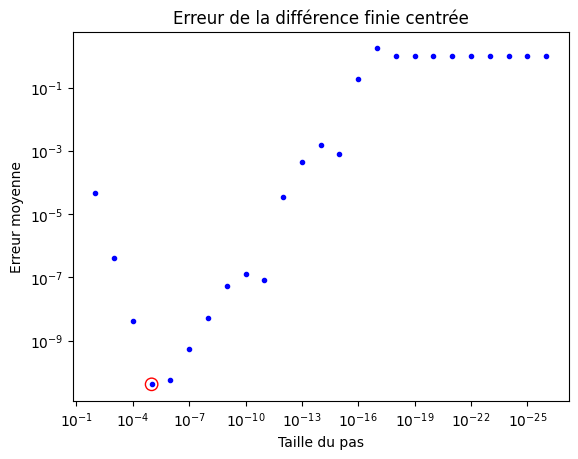

La taille de as optimale est de 1e-05


In [2]:
def function(x):
    return np.exp(x) / np.sqrt(np.sin(x)**3 + np.cos(x)**3)

def function_derivative(x):
    return (np.exp(x) * (2*np.sin(x)**3 + 2*np.cos(x)**3 + 3*np.sin(x)*np.cos(x)**2 - 3*np.sin(x)**2*np.cos(x))) \
           / (2*(np.sin(x)**3 + np.cos(x)**3)**(3/2))

def finite_difference(vector_x):
    return (function(vector_x[2:]) - function(vector_x[:-2])) / (vector_x[2:] - vector_x[:-2])

def plot_finite_difference(vector_x, vector_y, exp):
    plt.figure()
    plt.plot(vector_x, function(vector_x), '.g', label="Points")
    plt.plot(np.arange(0, 100*10**-exp, 10**-exp), function(np.arange(0, 100*10**-exp, 100**-exp)), 'k', label="Vraie fonction")
    plt.plot(vector_x[1:-1], vector_y, '.b', label="Approximation")
    plt.plot(np.arange(0, 100*10**-exp, 10**-exp), function_derivative(np.arange(0, 100*10**-exp, 100**-exp)), 'r', label="Vraie dérivée")
    plt.legend()
    plt.show()
    return

# Symbolic derivative using CasADi
x_sym = cas.MX.sym("x", 1)
derivative_sym = cas.Function("derivative", [x_sym], [cas.jacobian(function(x_sym), x_sym)])


nb_pas_a_essayer = 25
fig, ax = plt.subplots(1, 1)
errors = np.zeros(nb_pas_a_essayer)
for i, pas_cette_fois in enumerate(range(2, nb_pas_a_essayer+2)):
    vector_x = np.arange(0, 100*10**-pas_cette_fois, 10**-pas_cette_fois)
    vector_y = finite_difference(vector_x)
    # true_derivative = function_derivative(vector_x)
    sym_derivative = derivative_sym(vector_x)
    # RMS normalized error
    errors[i] = np.mean(np.abs(vector_y - sym_derivative[1:-1]) / np.abs(sym_derivative[1:-1]))
    # plot_finite_difference(vector_x, vector_y, exp)
    ax.plot(10**-pas_cette_fois, errors[i], '.b')
pas_optimal = 10**-(float(np.nanargmin(errors))+2)
ax.scatter(pas_optimal, np.nanmin(errors), s=80, facecolors='none', edgecolors='r')  # Taille de pas optimale
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Taille du pas")
ax.set_ylabel("Erreur moyenne")
ax.set_title("Erreur de la différence finie centrée")
plt.show()
print(f"La taille de as optimale est de {pas_optimal}")

## #2

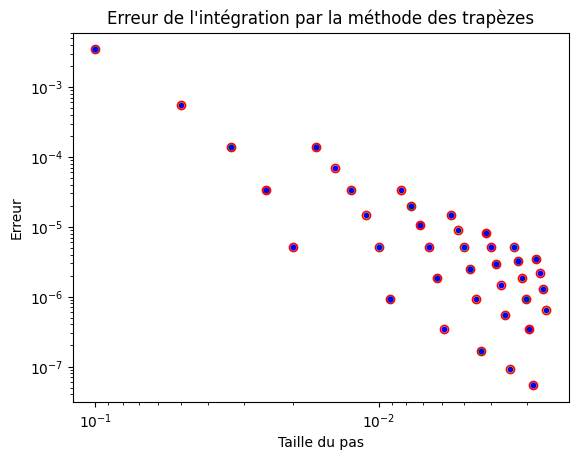

In [11]:
def function(x):
    return np.sin(x)

def trapezoidal_integration(vector_x):
    return np.sum((vector_x[1:] - vector_x[:-1]) * (function(vector_x[1:]) + function(vector_x[:-1])) / 2)

fig, ax = plt.subplots(1, 1)
for exp in range(1, 40):
    vector_x = np.arange(0, 2*np.pi, 0.1/exp)
    integral = trapezoidal_integration(vector_x)
    integral_scipy = scipy.integrate.trapezoid(function(vector_x), x=vector_x)
    # True integral = 0
    ax.plot(0.1/exp, integral, '.b')
    ax.scatter(0.1/exp, integral_scipy, edgecolor='r', facecolor=None)
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Taille du pas")
ax.set_ylabel("Erreur")
ax.set_title("Erreur de l'intégration par la méthode des trapèzes")
plt.savefig("trapezes_erreur.png")
plt.show()